# K-Means Clustering

K-means is an algorithm that identifies clusters of similar objects. It can be summarized by the following four steps: 

1. Randomly pick k cluster centers from the data points. 
2. Assign each data point to the closest cluster center.
3. Set each cluster center as the mean of the data points that are assigned to it.
4. Repeat the steps 2 and 3 until the clusters do not change or a maximum number of iterations is reached.

The optimal values of K-Means' parameters are found by minimizing
a cost function given by sum of distances from the centers.
In k-means++ algorithm the initial centroids are placed far away from each other.

In [1]:
import org.apache.spark.sql.functions._
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.DenseVector
import org.apache.spark.ml.feature.VectorAssembler
import org.apache.spark.ml.feature.StandardScaler
import org.apache.spark.ml.clustering.KMeans
import breeze.plot._
import convert.jfc.tohtml

# Load the dataset

In [2]:
val df = spark.read.
    format("csv").
    option("header", "true").
    option("inferschema", "true").
    option("delimiter",",").
    load("../Datasets/Blobs.csv")

df = [x1: double, x2: double]


[x1: double, x2: double]

## Explore the dataset

In [3]:
df.show(10)

+---------------+-------------+
|             x1|           x2|
+---------------+-------------+
| 0.519858965824| 4.8622954715|
|   1.6924688322|0.20598168224|
|  1.35678894112|4.36462483569|
| -1.56986939671|3.01502873036|
| -1.63667452739|  2.375863951|
| -1.52259006376|3.18138436556|
|  1.03992528754|1.92991009062|
| 0.363552319131|4.72596881565|
| -2.00715620404|2.52132357998|
|-0.657467674495|3.41507945699|
+---------------+-------------+
only showing top 10 rows



In [4]:
df.printSchema

root
 |-- x1: double (nullable = true)
 |-- x2: double (nullable = true)



In [5]:
df.columns

[x1, x2]

In [6]:
df.columns.length

2

In [7]:
df.count

300

In [8]:
df.describe().show()

+-------+-----------------+-----------------+
|summary|               x1|               x2|
+-------+-----------------+-----------------+
|  count|              300|              300|
|   mean| 0.44462709074599|2.691562129525892|
| stddev|1.583853197615698|1.524377851134544|
|    min|   -2.71169746584|  -0.488632718275|
|    max|    3.20722587027|    5.27917502506|
+-------+-----------------+-----------------+



## Apply Vector Assembler

In [9]:
val assembler = new VectorAssembler().
  setInputCols(Array("x1", "x2")).
  setOutputCol("features")

assembler = vecAssembler_240b550b6095


vecAssembler_240b550b6095

In [10]:
val df_v = assembler.transform(df).select("features")
df_v.show(10)

+--------------------+
|            features|
+--------------------+
|[0.519858965824,4...|
|[1.6924688322,0.2...|
|[1.35678894112,4....|
|[-1.56986939671,3...|
|[-1.63667452739,2...|
|[-1.52259006376,3...|
|[1.03992528754,1....|
|[0.363552319131,4...|
|[-2.00715620404,2...|
|[-0.657467674495,...|
+--------------------+
only showing top 10 rows



df_v = [features: vector]


[features: vector]

## Scale the features

In [11]:
val scaler = new StandardScaler().
  setInputCol("features").
  setOutputCol("scaledFeatures")

scaler = stdScal_6913541fbf6b


stdScal_6913541fbf6b

In [12]:
val df_s = scaler.fit(df_v).transform(df_v).select(col("scaledFeatures").as("features"))

df_s = [features: vector]


[features: vector]

## Train the model

In [13]:
val kmeans = new KMeans().setK(3)
val model = kmeans.fit(df_s)

kmeans = kmeans_0bdac8feab32
model = kmeans_0bdac8feab32


kmeans_0bdac8feab32

In [14]:
model.clusterCenters

[[1.2430903729422478,0.5544380536664439], [-1.006775081639963,1.8818568219221703], [0.6058595227814751,2.860742458408303]]

In [15]:
model.computeCost(df_s)

61.071807651178574

## Plot predictions

In [16]:
val predictions = model.transform(df_s).select(col("features"),col("prediction").cast("double"))
predictions.show(10)

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[0.32822421080854...|       2.0|
|[1.06857683196132...|       0.0|
|[0.85663806668603...|       2.0|
|[-0.9911710246083...|       1.0|
|[-1.0333498899101...|       1.0|
|[-0.9613201943539...|       1.0|
|[0.65657934024787...|       0.0|
|[0.22953662604481...|       2.0|
|[-1.2672615158156...|       1.0|
|[-0.4151064476712...|       1.0|
+--------------------+----------+
only showing top 10 rows



predictions = [features: vector, prediction: double]


[features: vector, prediction: double]

In [17]:
val x1 = predictions.select("features").collect.map(row=>row(0).asInstanceOf[DenseVector](0))

x1 = Array(0.32822421080854314, 1.068576831961327, 0.8566380666860312, -0.9911710246083734, -1.033349889910137, -0.9613201943539197, 0.6565793402478737, 0.22953662604481567, -1.267261515815692, -0.41510644767124827, 0.686381553635489, 1.4767231356295862, 1.8179304697395537, 0.7565105760582798, 1.2131179555544918, -1.032531803232691, 0.7434027982596473, 0.7352214497359919, -0.8570566720788783, 0.9223316243823084, -1.1026898053109628, 0.715220281194811, 0.9322769901041522, 0.33370314795945044, -1.494780655514039, -1.2576811206232317, 0.2853759405817549, -1.2891798671453858, 1.4802686725192762, 1.5154034523611022, -0.7778272031174195, 0.2783678237697237, 0.8137659512890865, 1.3470445326825498, 1.5417426399151006, -1.5802007835875673, 1.4535049167281378, -0.6236722966825606, ...


[0.32822421080854314, 1.068576831961327, 0.8566380666860312, -0.9911710246083734, -1.033349889910137, -0.9613201943539197, 0.6565793402478737, 0.22953662604481567, -1.267261515815692, -0.41510644767124827, 0.686381553635489, 1.4767231356295862, 1.8179304697395537, 0.7565105760582798, 1.2131179555544918, -1.032531803232691, 0.7434027982596473, 0.7352214497359919, -0.8570566720788783, 0.9223316243823084, -1.1026898053109628, 0.715220281194811, 0.9322769901041522, 0.33370314795945044, -1.494780655514039, -1.2576811206232317, 0.2853759405817549, -1.2891798671453858, 1.4802686725192762, 1.5154034523611022, -0.7778272031174195, 0.2783678237697237, 0.8137659512890865, 1.3470445326825498, 1.5417426399151006, -1.5802007835875673, 1.4535049167281378, -0.6236722966825606, 0.3733376566806505, 0.7979264269393764, -1.0054157931980152, 1.3880322805102696, 0.2541496604274749, 1.040870071993887, 1.0993592993537562, -0.912293973440963, 1.3861691079672318, -1.0879155434947627, -0.607762753779258, 1.10865

In [18]:
val x2 = predictions.select("features").collect.map(row=>row(0).asInstanceOf[DenseVector](1))

x2 = Array(3.189691760399926, 0.13512508206983895, 2.8632171691825317, 1.977874926558408, 1.5585794225701475, 2.0870051104404337, 1.26603131184544, 3.100260747118975, 1.6540017149314141, 2.2403103367372266, 0.6507920313829328, 0.5158341215039063, 0.6427392899685495, 2.932753508464231, 0.21888142362778978, 2.060236498741156, 2.5986879034169084, 2.4627010484086718, 2.5770540021663386, 0.4226350325869022, 1.9736258131150584, 2.543161759346392, 0.48643945713532444, 2.9502124903171834, 1.6225613488474215, 1.8555686263643725, 2.357537769382617, 1.7993639680598497, 0.7035597425085784, 1.0158811829806094, 1.794799664868996, 3.169170417501433, 2.2978282563230716, 0.6650281472441338, 0.2005561413880818, 1.6977000778015008, 0.5507897466472008, 1.0747269300329148, 3.00018261199883, 0...


[3.189691760399926, 0.13512508206983895, 2.8632171691825317, 1.977874926558408, 1.5585794225701475, 2.0870051104404337, 1.26603131184544, 3.100260747118975, 1.6540017149314141, 2.2403103367372266, 0.6507920313829328, 0.5158341215039063, 0.6427392899685495, 2.932753508464231, 0.21888142362778978, 2.060236498741156, 2.5986879034169084, 2.4627010484086718, 2.5770540021663386, 0.4226350325869022, 1.9736258131150584, 2.543161759346392, 0.48643945713532444, 2.9502124903171834, 1.6225613488474215, 1.8555686263643725, 2.357537769382617, 1.7993639680598497, 0.7035597425085784, 1.0158811829806094, 1.794799664868996, 3.169170417501433, 2.2978282563230716, 0.6650281472441338, 0.2005561413880818, 1.6977000778015008, 0.5507897466472008, 1.0747269300329148, 3.00018261199883, 0.7890782121996563, 2.285799546691563, 0.7885745494696919, 2.6797012971815097, 0.10788105843613785, 0.43109397071002103, 1.9457399863704867, 0.2631249556495938, 0.9150032801197475, 2.0768359577999234, 0.2228549612585628, 2.002675

In [19]:
val fig = Figure()
val plt = fig.subplot(0)

fig = breeze.plot.Figure@5a090b89
plt = breeze.plot.Plot@13f36ed1


breeze.plot.Plot@13f36ed1

In [20]:
val c = predictions.select("prediction").as[Double].collect.map(Map(0.0 -> java.awt.Color.red, 1.0 -> java.awt.Color.blue,  2.0 -> java.awt.Color.green))

plt += scatter(x1, x2, size = x1.map(i=>0.1), colors = c)

plt.legend = true
plt.title = "KMeans"
plt.xlabel = "x1"
//plt.xlim(0,6)
plt.ylabel = "x2"

c = Array(java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g...


[java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=255,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=255,g=0,b=0], java.awt.Color[r=0,g=0,b=255], java.awt.Color[r=0,g=255,b=0], java.aw


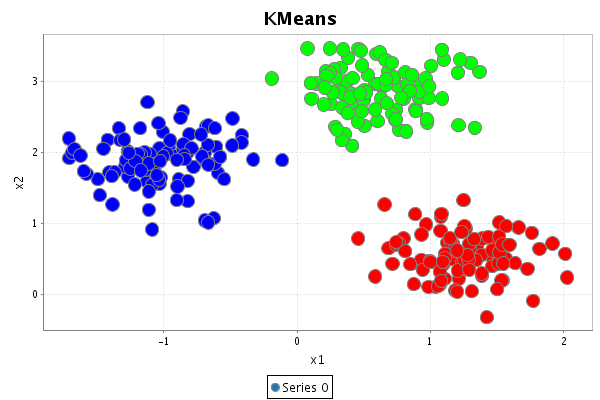

In [21]:
kernel.magics.html(tohtml(plt.chart))

# The elbow method
If K is not specified by the problem's context, the optimal number of clusters can
be estimated using a technique called the elbow method. The elbow method plots
the value of the cost function produced by different values of K . As K increases,
the cost function will decrease because the instances will be closer to their respective centroids. However,
the improvements to the cost function will decline as K increases. The value of K at which the improvement to the cost function declines the most is called the elbow.

## Calculate the cost function J(k)

In [22]:
var x = new Array[Double](5)
var y = new Array[Double](5)

for(k <- 2 to 6){

  val kmeans = new KMeans().setK(k)
  val model = kmeans.fit(df_s)
  val J = model.computeCost(df_s)

  x(k-2) = k.toDouble
  y(k-2) = J
}

x = Array(2.0, 3.0, 4.0, 5.0, 6.0)
y = Array(239.01218048599586, 61.071807651178574, 52.64568129582726, 45.89645241173617, 39.66918647766452)


[239.01218048599586, 61.071807651178574, 52.64568129582726, 45.89645241173617, 39.66918647766452]

## Plot J(k)

In [23]:
val fig2 = Figure()
val plt2 = fig2.subplot(0)

fig2 = breeze.plot.Figure@23105a8d
plt2 = breeze.plot.Plot@1ffe7f27


breeze.plot.Plot@1ffe7f27

In [24]:
plt2 += plot(x, y, name = "points", colorcode="red")
plt2.legend = true
plt2.title = "Elbow Method"
plt2.xlabel = "k"
//plt.xlim(0,10)
plt2.ylabel = "J"

plt2.legend: Boolean = true
plt2.title: String = Elbow Method
plt2.xlabel: String = k
plt2.ylabel: String = J



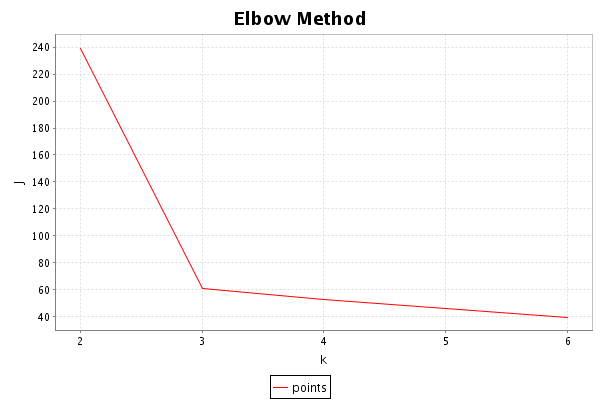

In [25]:
kernel.magics.html(tohtml(plt2.chart))